In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns


### adjust your file(paths)

In [3]:
#myfilepath = "enter/path/here"
myfilepath = r"F2_males atf3 in mph and SGC/"

import sys
sys.path.append(myfilepath)  
import analysis_perDRG #adjust file here

In [5]:
#open all json result files
#adjust files accordingly 

with open (myfilepath + "F2_W1_M.json") as f:
    results_W1_M = json.load (f) 
    
with open (myfilepath + "F2_W5_M.json") as f:
    results_W5_M = json.load (f)
"""
with open (myfilepath + "F6_W1_F.json") as f:
    results_W1_F = json.load (f)   
 
with open (myfilepath + "F6_W5_F.json") as f:
    results_W5_F = json.load (f)
"""

'\nwith open (myfilepath + "F6_W1_F.json") as f:\n    results_W1_F = json.load (f)   \n \nwith open (myfilepath + "F6_W5_F.json") as f:\n    results_W5_F = json.load (f)\n'

### set data

#### L4 and L5 together pooled

In [ ]:
#set data in groups
w5_il_m = analysis_perDRG.GroupData (results_w5_m, "IL")
w5_cl_m = analysis_perDRG.GroupData (results_w5_m, "CL")
w1_il_m = analysis_perDRG.GroupData (results_w1_m, "IL")
w1_cl_m = analysis_perDRG.GroupData (results_w1_m, "CL")

w5_il_f = analysis_perDRG.GroupData (results_w5_f, "IL")
w5_cl_f = analysis_perDRG.GroupData (results_w5_f, "CL")
w1_il_f = analysis_perDRG.GroupData (results_w1_f, "IL")
w1_cl_f = analysis_perDRG.GroupData (results_w1_f, "CL")

#### seperate L4 and L5

In [11]:
#groups with distinction L4 and L5

w5_m_il_l4 = analysis_perDRG.GroupData (results_W5_M, "L4IL", 5)
w5_m_cl_l4 = analysis_perDRG.GroupData (results_W5_M, "L4CL", 5)
w1_m_il_l4 = analysis_perDRG.GroupData (results_W1_M, "L4IL", 7)
w1_m_cl_l4 = analysis_perDRG.GroupData (results_W1_M, "L4CL", 7)

w5_m_il_l5 = analysis_perDRG.GroupData (results_W5_M, "L5IL", 5)
w5_m_cl_l5 = analysis_perDRG.GroupData (results_W5_M, "L5CL", 5)
w1_m_il_l5 = analysis_perDRG.GroupData (results_W1_M, "L5IL", 7)
w1_m_cl_l5 = analysis_perDRG.GroupData (results_W1_M, "L5CL", 7)
"""
w5_f_il_l4 = analysis_perDRG.GroupData (results_W5_F, "L4IL" )
w5_f_cl_l4 = analysis_perDRG.GroupData (results_W5_F, "L4CL" )
w1_f_il_l4 = analysis_perDRG.GroupData (results_W1_F, "L4IL" )
w1_f_cl_l4 = analysis_perDRG.GroupData (results_W1_F, "L4CL" )

w5_f_il_l5 = analysis_perDRG.GroupData (results_W5_F, "L5IL" )
w5_f_cl_l5 = analysis_perDRG.GroupData (results_W5_F, "L5CL" )
w1_f_il_l5 = analysis_perDRG.GroupData (results_W1_F, "L5IL" )
w1_f_cl_l5 = analysis_perDRG.GroupData (results_W1_F, "L5CL" )
"""

C:\Users\fesi9\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\fesi9\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


'\nw5_f_il_l4 = analysis_perDRG.GroupData (results_W5_F, "L4IL" )\nw5_f_cl_l4 = analysis_perDRG.GroupData (results_W5_F, "L4CL" )\nw1_f_il_l4 = analysis_perDRG.GroupData (results_W1_F, "L4IL" )\nw1_f_cl_l4 = analysis_perDRG.GroupData (results_W1_F, "L4CL" )\n\nw5_f_il_l5 = analysis_perDRG.GroupData (results_W5_F, "L5IL" )\nw5_f_cl_l5 = analysis_perDRG.GroupData (results_W5_F, "L5CL" )\nw1_f_il_l5 = analysis_perDRG.GroupData (results_W1_F, "L5IL" )\nw1_f_cl_l5 = analysis_perDRG.GroupData (results_W1_F, "L5CL" )\n'

#### quick data check example

In [12]:
w1_m_il_l4.iba1_per_nra_allrats

[9.58711122576398,
 10.219344719338931,
 11.470242804793669,
 5.903350468878515,
 9.695512951445629,
 9.424967194950385]

# functions for getting values per rat or DRG, statistics

#### get values / Dots per DRG

In [13]:
#generates a value per DRG each
def get_pooled (group_l4, group_l5, feature):
    l4 = getattr (group_l4, feature)
    l5 = getattr (group_l5, feature)
    L_pooled = []
    for i in range (len(l4)):
        L_pooled.append (l4[i])
        L_pooled.append (l5[i])
    return (L_pooled)

# Boxplots

### all conditions

In [ ]:

#plots all Cl, line, all IL: M1W, F1W, M5W, F5W

def plot_all_conditions_MtoF_1vs5W (feature, ylabel, saveto, ylim=None):
    w1_m_il_data = get_pooled (w1_m_il_l4, w1_m_il_l5, feature)
    w1_m_cl_data = get_pooled (w1_m_cl_l4, w1_m_cl_l5, feature)
    w5_m_il_data = get_pooled (w5_m_il_l4, w5_m_il_l5, feature)
    w5_m_cl_data = get_pooled (w5_m_cl_l4, w5_m_cl_l5, feature)
    
    w1_f_il_data = get_pooled (w1_f_il_l4, w1_f_il_l5, feature)
    w1_f_cl_data = get_pooled (w1_f_cl_l4, w1_f_cl_l5, feature)
    w5_f_il_data = get_pooled (w5_f_il_l4, w5_f_il_l5, feature)
    w5_f_cl_data = get_pooled (w5_f_cl_l4, w5_f_cl_l5, feature)

    data = [np.array([np.nan]), w1_m_cl_data, w5_m_cl_data, np.array([np.nan]), w1_m_il_data, w5_m_il_data, np.array([np.nan]),
                      w1_f_cl_data, w5_f_cl_data, np.array([np.nan]), w1_f_il_data, w5_f_il_data, np.array([np.nan])]
    
    plt.figure(figsize=(12,8))
    
    labels = ["1W M CL","5W M CL",  "", 
              "1W M IL", "5W M IL", "", 
              "1W F CL", "5W F CL", "",  
              "1W F IL", "5W F IL", ""]
    
    
    c_L2 = ["k", '#79cfd8', '#b2ef7d', #MCL1W, #MCL5W
            "k", '#37abb8', '#6cad31', #MIL1W, #MIL5W
            "k", '#ff99ff', '#fab38a', #FCL1W, #FCL5W
            "k", "#ff66ff", "#f77732", #FIL1W, #FIL5W
            "k"]  
    
    c ='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":2.5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 3
    fontsize = 30
    
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(axis = "x", length=0)
    ax.tick_params(axis = "y", length=10, width=linewidth)
    if ylim is not None:
        ax.set_ylim (ylim)
    plt.xticks(fontname="Arial", fontsize=fontsize, rotation = 45)
    plt.yticks(fontname="Arial", fontsize=fontsize)
    
    plt.ylabel(ylabel, fontname="Arial", fontsize=fontsize+8)
    #plt.axvline(3, c='gray', linewidth=4, ls='--')
    plt.axvline(6, c='gray', linewidth= linewidth, ls='--')
    #plt.axvline(9, c='gray', linewidth=4, ls='--')

    ax.set_xticklabels(labels, fontname="Arial", fontsize=24)
    
     #linien farbig
    for i in range(len(data)):
        if data[i] is not None and not np.isnan(data[i]).all():
            sns.boxplot(data=[data[i]], positions=[i], width=0.9, 
                        boxprops=dict(edgecolor=c_L2[i], facecolor='white', linewidth=2.5), 
                        whiskerprops=dict(color=c_L2[i], linewidth=2.5), 
                        capprops=dict(color=c_L2[i], linewidth=2.5), 
                        medianprops=dict(color=c_L2[i], linewidth=2.5),
                        fliersize=0, showcaps=True, patch_artist=True)

    sns.stripplot(data=data, jitter=0.3, dodge=False, size=8, marker='o', palette=c_L2, alpha = 1, 
                 edgecolor='black', linewidth=0.7)                    

    
    plt.savefig(saveto + ylabel+ '.png', bbox_inches = "tight")
    plt.show()

#### CL to IL Mvs F colors pink and blue

In [17]:
def plot_all_conditions_CLtoIL_MvsF (feature, ylabel, saveto, ylim=None):
    w1_m_il_data = get_pooled (w1_m_il_l4, w1_m_il_l5, feature)
    w1_m_cl_data = get_pooled (w1_m_cl_l4, w1_m_cl_l5, feature)
    w5_m_il_data = get_pooled (w5_m_il_l4, w5_m_il_l5, feature)
    w5_m_cl_data = get_pooled (w5_m_cl_l4, w5_m_cl_l5, feature)
    
    w1_f_il_data = get_pooled (w1_f_il_l4, w1_f_il_l5, feature)
    w1_f_cl_data = get_pooled (w1_f_cl_l4, w1_f_cl_l5, feature)
    w5_f_il_data = get_pooled (w5_f_il_l4, w5_f_il_l5, feature)
    w5_f_cl_data = get_pooled (w5_f_cl_l4, w5_f_cl_l5, feature)
    
    plt.figure(figsize=(12,8))
    
    labels = ["1W M CL", "1W F CL","", "5W M CL", "5W F CL", "", "1W M IL", "1W F IL","", "5W M IL", "5W F IL"]
    
    c_L = ["k", '#AFCAFF', "#FBCDF3", "k", '#AFCAFF', "#FBCDF3", "k", 
           '#6699FF', "#FF3399", "k", '#6699FF', "#FF3399"]

    data= data=[np.array([np.nan]), w1_m_cl_data, w1_f_cl_data, np.array([np.nan]), w5_m_cl_data, w5_f_cl_data, np.array([np.nan]),
                      w1_m_il_data, w1_f_il_data, np.array([np.nan]), w5_m_il_data, w5_f_il_data, np.array([np.nan])]
    
    c ='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":2.5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 3
    fontsize = 30
    
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(axis = "x", length=0)
    ax.tick_params(axis = "y", length=10, width=linewidth)
    if ylim is not None:
        ax.set_ylim (ylim)
    plt.xticks(fontname="Arial", fontsize=fontsize, rotation = 45)
    plt.yticks(fontname="Arial", fontsize=fontsize)
    
    plt.ylabel(ylabel, fontname="Arial", fontsize=fontsize+8)
    #plt.axvline(3, c='gray', linewidth=4, ls='--')
    plt.axvline(6, c='gray', linewidth= linewidth, ls='--')
    #plt.axvline(9, c='gray', linewidth=4, ls='--')


    for i in range(len(data)):
        if data[i] is not None and not np.isnan(data[i]).all():
            sns.boxplot(data=[data[i]], positions=[i], width=0.9, 
                        boxprops=dict(edgecolor=c_L[i], facecolor='white', linewidth=2.5), 
                        whiskerprops=dict(color=c_L[i], linewidth=2.5), 
                        capprops=dict(color=c_L[i], linewidth=2.5), 
                        medianprops=dict(color=c_L[i], linewidth=2.5),
                        fliersize=0, showcaps=True, patch_artist=True)
            
    sns.stripplot(data=data, jitter=0.3, dodge=False, size=8, marker='o', palette=c_L, alpha = 1, 
                 edgecolor='black', linewidth=0.7)   
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=24)
    
    plt.savefig(saveto + 'CLtoIL_DRG_M-F ---- '+ylabel+'.png', bbox_inches = "tight")
    plt.show()

### only males 

In [15]:
def plot_onlymales_CLtoIL (feature, ylabel, saveto, ylim=None):
    w1_m_il_data = get_pooled (w1_m_il_l4, w1_m_il_l5, feature)
    w1_m_cl_data = get_pooled (w1_m_cl_l4, w1_m_cl_l5, feature)
    w5_m_il_data = get_pooled (w5_m_il_l4, w5_m_il_l5, feature)
    w5_m_cl_data = get_pooled (w5_m_cl_l4, w5_m_cl_l5, feature)
    
    plt.figure(figsize=(6,8))
    
    labels = ["1W M CL", "5W M CL", "", "1W M IL", "5W M IL"]
    
    c_L = ["k", "#79cfd8", "#b2ef7d", "k", "#37abb8", "#6cad31"] 

    data = [np.array([np.nan]), w1_m_cl_data, w5_m_cl_data, np.array([np.nan]),
                      w1_m_il_data, w5_m_il_data, np.array([np.nan])]
    
    c ='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":2.5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 3
    fontsize = 30
    
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(axis = "x", length=0)
    ax.tick_params(axis = "y", length=10, width=linewidth)
    if ylim is not None:
        ax.set_ylim (ylim)
    plt.xticks(fontname="Arial", fontsize=fontsize, rotation = 45)
    plt.yticks(fontname="Arial", fontsize=fontsize)
    
    plt.ylabel(ylabel, fontname="Arial", fontsize=fontsize+8)
    plt.axvline(3, c='gray', linewidth= linewidth, ls='--')

    for i in range(len(data)):
        if data[i] is not None and not np.isnan(data[i]).all():
            sns.boxplot(data=[data[i]], positions=[i], width=0.9, 
                        boxprops=dict(edgecolor=c_L[i], facecolor='white', linewidth=2.5), 
                        whiskerprops=dict(color=c_L[i], linewidth=2.5), 
                        capprops=dict(color=c_L[i], linewidth=2.5), 
                        medianprops=dict(color=c_L[i], linewidth=2.5),
                        fliersize=0, showcaps=True, patch_artist=True)
    sns.stripplot(data=data
                  , jitter=0.3, dodge=False, size=8, marker='o', palette=c_L, alpha = 1, 
                  edgecolor='black', linewidth=0.7)
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=24)
    
    plt.savefig(saveto +ylabel+'.png', bbox_inches = "tight")
    plt.show()

In [79]:
def plot_onlymales_ATF3split (feature_pos, feature_neg, ylabel, saveto, ylim=None, figsize = (6,8)):
    w1_m_pos_data = get_pooled(w1_m_il_l4, w1_m_il_l5, feature_pos)
    w1_m_neg_data = get_pooled(w1_m_il_l4, w1_m_il_l5, feature_neg)
    w5_m_pos_data = get_pooled(w5_m_il_l4, w5_m_il_l5, feature_pos)
    w5_m_neg_data = get_pooled(w5_m_il_l4, w5_m_il_l5, feature_neg)
    
    plt.figure(figsize=figsize)
    
    labels = ["1W ATF3-", "1W ATF3+", "", "5W ATF3-", "5W ATF3+"]
    
    c_L = ["k", "#79cfd8", "#37abb8", "k", "#b2ef7d", "#6cad31"]  
    data = [np.array([np.nan]), w1_m_neg_data, w1_m_pos_data, np.array([np.nan]),
                      w5_m_neg_data, w5_m_pos_data, np.array([np.nan])]
    
    c ='k'
    alpha=1
    standard_props = {"color":c, "alpha":alpha, "linewidth":2.5}
    markers= ['D','o']
    line_props = standard_props
    bbox_props = {**standard_props, 'facecolor': 'w', 'edgecolor':c} #dict(edgecolor=c, alpha=alpha, linewidth=5, facecolor='w')
    median_props = standard_props
    cap_props = standard_props
    linewidth = 3
    fontsize = 30
    
    ax = plt.gca()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines['left'].set_linewidth(linewidth)
    ax.spines['bottom'].set_linewidth(linewidth)
    ax.tick_params(axis = "x", length=0)
    ax.tick_params(axis = "y", length=10, width=linewidth)
    if ylim is not None:
        ax.set_ylim (ylim)
    plt.xticks(fontname="Arial", fontsize=fontsize, rotation = 45)
    plt.yticks(fontname="Arial", fontsize=fontsize)
    
    plt.ylabel(ylabel, fontname="Arial", fontsize=fontsize+8)
    plt.axvline(3, c='gray', linewidth= linewidth, ls='--')

    for i in range(len(data)):
        if data[i] is not None and not np.isnan(data[i]).all():
            sns.boxplot(data=[data[i]], positions=[i], width=0.9, 
                        boxprops=dict(edgecolor=c_L[i], facecolor='white', linewidth=2.5), 
                        whiskerprops=dict(color=c_L[i], linewidth=2.5), 
                        capprops=dict(color=c_L[i], linewidth=2.5), 
                        medianprops=dict(color=c_L[i], linewidth=2.5),
                        fliersize=0, showcaps=True, patch_artist=True)
    sns.stripplot(data=data
                  , jitter=0.3, dodge=False, size=8, marker='o', palette=c_L, alpha = 1, 
                    edgecolor='black', linewidth=0.7)
    
    ax.set_xticklabels(labels, fontname="Arial", fontsize=24)
    
    plt.savefig(saveto + 'ATF3split -- '+ylabel+'.png', bbox_inches = "tight")
    plt.show()

## Use plot 

C:\Users\fesi9\AppData\Local\Temp\ipykernel_22832\2954498985.py:49: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=data
C:\Users\fesi9\AppData\Local\Temp\ipykernel_22832\2954498985.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontname="Arial", fontsize=24)


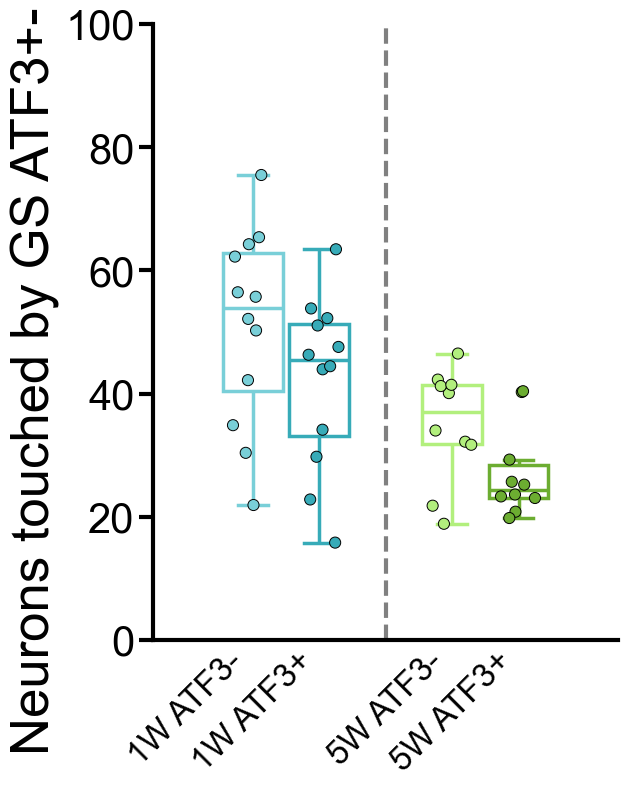

In [87]:
root= r"C:\Users\fesi9\OneDrive\Dokumente\Uni\PhD\1- ResolvePAIN P9\Feli CCI DRG Paper\Data analysis\4_image analysis/plots June25/"
saveto = root + "FigS7 -- F2 -- "
#parameter = "atf3_neg_anz_allrats"
feature_pos = "gs_neuronratio_borders_atf3_allrats"
feature_neg = "gs_neuronratio_borders_atf3_neg_allrats"
label = "Neurons touched by GS ATF3+- (%)"
ylim = (0, 100)
#ylim = None 

#plot_all_conditions_MtoF_1vs5W (parameter, label, saveto, ylim = ylim)
#plot_all_conditions_CLtoIL_MvsF (parameter, label, saveto, ylim = ylim)
plot_onlymales_ATF3split (feature_pos, feature_neg, label, saveto, ylim = ylim)